In [23]:
import yfinance as yf
import os
import pandas as pd

DATA_PATH = "msft_data.json"

if os.path.exists(DATA_PATH):
    # Read the data if it is already downloaded
    with open(DATA_PATH) as f:
        msft_hist = pd.read_json(DATA_PATH)
else:
    msft = yf.Ticker("MSFT")
    msft_hist = msft.history(period = "max")

    # Save the data in a json file
    msft_hist.to_json(DATA_PATH)



In [24]:
# Show the first 5 rows of the data
msft_hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1986-03-13 05:00:00,0.055241,0.063365,0.055241,0.060657,1031788800,0.0,0.0
1986-03-14 05:00:00,0.060657,0.063907,0.060657,0.062823,308160000,0.0,0.0
1986-03-17 05:00:00,0.062823,0.064448,0.062823,0.063907,133171200,0.0,0.0
1986-03-18 05:00:00,0.063907,0.064448,0.061740,0.062281,67766400,0.0,0.0
1986-03-19 05:00:00,0.062281,0.062823,0.060657,0.061198,47894400,0.0,0.0


<Axes: >

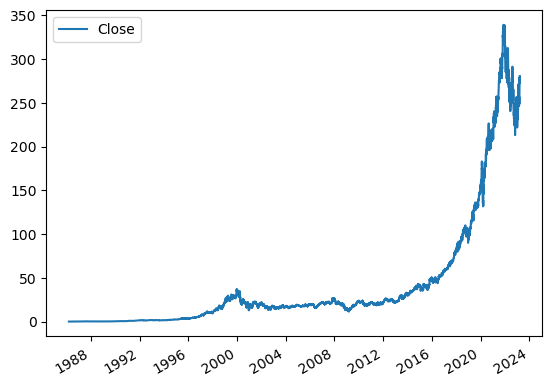

In [25]:
# Plot the stock prices
msft_hist.plot.line(y="Close", use_index=True)

In [26]:
# Save the actual closing data
data = msft_hist[["Close"]]
data = data.rename(columns = {'Close': 'Actual_Close'})

# Save in target if the price went up or down
data["target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [27]:
data.head()

,Actual_Close,target
1986-03-13 05:00:00,0.060657,NaN
1986-03-14 05:00:00,0.062823,1.0
1986-03-17 05:00:00,0.063907,1.0
1986-03-18 05:00:00,0.062281,0.0
1986-03-19 05:00:00,0.061198,0.0


In [28]:
# shift stock prices one day, to predict tomorrow's prices whith today's prices
msft_prev = msft_hist.copy()
msft_prev = msft_prev.shift(1)

In [29]:
msft_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1986-03-13 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 05:00:00,0.055241,0.063365,0.055241,0.060657,1.031789e+09,0.0,0.0
1986-03-17 05:00:00,0.060657,0.063907,0.060657,0.062823,3.081600e+08,0.0,0.0
1986-03-18 05:00:00,0.062823,0.064448,0.062823,0.063907,1.331712e+08,0.0,0.0
1986-03-19 05:00:00,0.063907,0.064448,0.061740,0.062281,6.776640e+07,0.0,0.0


In [30]:
# Create training data
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data.join(msft_prev[predictors]).iloc[1:]

In [31]:
data.head()

,Actual_Close,target,Close,Volume,Open,High,Low
1986-03-14 05:00:00,0.062823,1.0,0.060657,1.031789e+09,0.055241,0.063365,0.055241
1986-03-17 05:00:00,0.063907,1.0,0.062823,3.081600e+08,0.060657,0.063907,0.060657
1986-03-18 05:00:00,0.062281,0.0,0.063907,1.331712e+08,0.062823,0.064448,0.062823
1986-03-19 05:00:00,0.061198,0.0,0.062281,6.776640e+07,0.063907,0.064448,0.061740
1986-03-20 05:00:00,0.059574,0.0,0.061198,4.789440e+07,0.062281,0.062823,0.060657
